# Intro to Natural Language Processing (NLP)

The Natural Language Processing (NLP) field is incredibly vast, and it has applications in virtually every aspect of data science. In this notebook, we will walk through a **very brief** survey of NLP, and provide some instruction on a couple handy tools along the way.

NLP tools span a wide range of implementations, and it is not uncommon for NLP packages to have conflicts with other Python libraries. So, to keep everything compatible in one place, it is recommended that you create a new pip environment for NLP projects. To set up an NLP pip environment for this lab, follow the steps in the "Pip Environment" section of the [Python Environment Setup page in Canvas](https://iu.instructure.com/courses/2181786/pages/week-1-%7C-python-environment-setup?module_item_id=30340853), and **use the *environment.yml* file provided in this folder.** This should install the packages you'll need for this lab.

Next, **[download a spaCy NLP model](https://spacy.io/models)** based on your preferences (in the NLP environment) so you can use the spaCy library installed in the environment.

*Optionally, if you prefer to use a different environment, install the following packages separately using pip: [Scikit-Learn](https://scikit-learn.org/stable/install.html#installing-the-latest-release), [spaCy](https://spacy.io/usage), [ScatterText](https://github.com/JasonKessler/scattertext#installation), [CorEx](https://ryanjgallagher.github.io/code/corex/example), and [vaderSentiment](https://github.com/cjhutto/vaderSentiment#installation).*

## Preprocessing

To illustrate preprocessing text data, we'll use the [spaCy](https://spacy.io/) package.

*spaCy is capable of **much** more than just preprocessing, but we are only concerned with this feature for this lab. More complicated implementations of the package will come back in a later lesson, or they're more appropriate for a more advanced course.*

In [10]:
import pandas as pd
import spacy
from spacy import displacy
print(spacy.__version__)

3.7.4


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%config InlineBackend.figure_formats = ['svg']

ModuleNotFoundError: No module named 'seaborn'

### Tokenizing

The very first part of dealing with text data is to collect each **term** or unitary element of text (e.g., words, punctuation, etc.) in the form of "tokens".

In [ ]:
# depends on your choice of spaCy model
nlp = spacy.load('en_core_web_sm')

In [ ]:
intro = '''The Natural Language Processing (NLP) field is incredibly vast,
and it has applications in virtually every aspect of data science.
In this notebook, we will walk through a **very brief** survey of NLP,
and provide some instruction on a couple handy tools along the way.
'''

doc = nlp(intro)

In [ ]:
print([t.text for t in doc])

['The', 'Natural', 'Language', 'Processing', '(', 'NLP', ')', 'field', 'is', 'incredibly', 'vast', ',', '\n', 'and', 'it', 'has', 'applications', 'in', 'virtually', 'every', 'aspect', 'of', 'data', 'science', '.', '\n', 'In', 'this', 'notebook', ',', 'we', 'will', 'walk', 'through', 'a', '*', '*', 'very', 'brief', '*', '*', 'survey', 'of', 'NLP', ',', '\n', 'and', 'provide', 'some', 'instruction', 'on', 'a', 'couple', 'handy', 'tools', 'along', 'the', 'way', '.', '\n']


In [ ]:
for i, sentence in enumerate(doc.sents):
    print(f"sentence {i+1}\n\n", sentence)

sentence 1

 The Natural Language Processing (NLP) field is incredibly vast,
and it has applications in virtually every aspect of data science.

sentence 2

 In this notebook, we will walk through a **very brief** survey of NLP,
and provide some instruction on a couple handy tools along the way.



In [ ]:
df_intro = []

for token in doc:
    df_intro.append([
        token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
        token.shape_, token.is_alpha, token.is_stop
    ])

In [ ]:
df_intro = pd.DataFrame(columns=["text", "lemma_", "pos_", "tag_", "dep_", "shape_", "is_alpha", "is_stop"],
                        data=df_intro)

In [ ]:
df_intro.sample(5)

,text,lemma_,pos_,tag_,dep_,shape_,is_alpha,is_stop
23,science,science,NOUN,NN,pobj,xxxx,True,False
11,",",",",PUNCT,",",punct,",",False,False
46,and,and,CCONJ,CC,cc,xxx,True,True
48,some,some,DET,DT,det,xxxx,True,True
28,notebook,notebook,NOUN,NN,pobj,xxxx,True,False


What is a **stop word**?

In [ ]:
df_intro[df_intro['is_stop']].sample(10)

,text,lemma_,pos_,tag_,dep_,shape_,is_alpha,is_stop
46,and,and,CCONJ,CC,cc,xxx,True,True
42,of,of,ADP,IN,prep,xx,True,True
27,this,this,DET,DT,det,xxxx,True,True
50,on,on,ADP,IN,prep,xx,True,True
8,is,be,AUX,VBZ,ROOT,xx,True,True
31,will,will,AUX,MD,aux,xxxx,True,True
19,every,every,PRON,DT,nummod,xxxx,True,True
34,a,a,DET,DT,det,x,True,True
26,In,in,ADP,IN,prep,Xx,True,True
33,through,through,ADP,IN,prep,xxxx,True,True


**Sentence Dependencies**

We can visualize some of these (like the sentence dependencies) using [displacy](https://spacy.io/usage/visualizers).

In [ ]:
doc = nlp('We can visualize these using displacy.')

In [ ]:
displacy.render(doc, style='dep', options={'distance': 80})

### Named Entity Recognition

Some words are **Named Entities**: locations like "Alaska", dates like "January 1st", companies like "Google", etc. spaCy can tag these using [Named Entity Recognition](https://spacy.io/usage/linguistic-features#named-entities).

In [ ]:
doc = nlp('... locations like "Alaska", dates like "January 1st", companies like "Google", etc.')

In [ ]:
displacy.render(doc, style='ent')

### Multiple Documents

*NLP Terms: A **document** is a collection of tokens, and a **corpus** is a collection of documents.*

When spaCy processes text, it runs it through a [pipeline](https://spacy.io/usage/processing-pipelines) of different models to store token attributes for each token. This is how we get the functionality above. Though, when we are tokenizing multiple documents, we might not need all of these elements. We might just need enough to filter our text based on the analysis done.

For example, suppose we've determined that we want to the remove the following tokens from a dataset of [coffee reviews](https://www.kaggle.com/datasets/schmoyote/coffee-reviews-dataset/) (descriptions):

- stop words (except the lemma "not", to maintain the idea of object negation)
- punctuation
- numbers

In this case, we don't need NER, Dependency Labels, or Document Labels. Removing these processes from the spaCy pipeline will save us some time.

In [ ]:
df_coffee = pd.read_csv('./data/coffee_analysis.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/coffee_analysis.csv'

In [ ]:
print(df_coffee['desc_1'].sample().iloc[0])

Crisp, delicate, richly sweet. Yellow plum, cocoa powder, narcissus, sandalwood, brown sugar in aroma and cup. Sweet-toned structure with lively acidity; full, satiny mouthfeel. Cocoa-toned plum and a hint of narcissus enliven the quiet finish.


In [ ]:
# nlp.pipe returns a generator
docs = list(nlp.pipe(df_coffee['desc_1'], disable=['ner', 'parser', 'textcat']))

# save the spaCy objects into the DataFrame
df_coffee['spacy_doc'] = docs

In [ ]:
def tokenizer(docs, join_tokens=False):
    '''
    Tokenize an iterable of spaCy `docs`.

    join_tokens : bool
        Whether we want to return a list of strings or
        a list of lists. If True, join with space (" ").
    '''
    docs_clean = []

    for doc in docs:
        # collect only filtered words from each document
        tokens = [w.lemma_.lower() for w in doc if
                  (not w.is_stop
                   and not w.is_punct
                   and not w.like_num) \
                  or (w.lemma_ == 'not')]

        if join_tokens:
            docs_clean.append(' '.join(tokens))
        else:
            docs_clean.append(tokens)

    return docs_clean

In [ ]:
df_coffee['docs_clean'] = tokenizer(docs)

In [ ]:
df_coffee[['desc_1', 'spacy_doc', 'docs_clean']].head()

,desc_1,spacy_doc,docs_clean
0,"Evaluated as espresso. Sweet-toned, deeply ric...","(Evaluated, as, espresso, ., Sweet, -, toned, ...","[evaluate, espresso, sweet, tone, deeply, rich..."
1,"Evaluated as espresso. Sweetly tart, floral-to...","(Evaluated, as, espresso, ., Sweetly, tart, ,,...","[evaluate, espresso, sweetly, tart, floral, to..."
2,"Crisply sweet, cocoa-toned. Lemon blossom, roa...","(Crisply, sweet, ,, cocoa, -, toned, ., Lemon,...","[crisply, sweet, cocoa, tone, lemon, blossom, ..."
3,"Delicate, sweetly spice-toned. Pink peppercorn...","(Delicate, ,, sweetly, spice, -, toned, ., Pin...","[delicate, sweetly, spice, tone, pink, pepperc..."
4,"Deeply sweet, subtly pungent. Honey, pear, tan...","(Deeply, sweet, ,, subtly, pungent, ., Honey, ...","[deeply, sweet, subtly, pungent, honey, pear, ..."


In [ ]:
print(df_coffee['desc_1'].iloc[0])

Evaluated as espresso. Sweet-toned, deeply rich, chocolaty. Vanilla paste, dark chocolate, narcissus, pink grapefruit zest, black cherry in aroma and cup. Plush, syrupy mouthfeel; resonant, flavor-saturated finish. In three parts milk, rich chocolate tones intensify, along with intimations of vanilla paste and black cherry in the short finish and floral-toned citrus zest in the long. 


In [ ]:
print(df_coffee['docs_clean'].iloc[0])

['evaluate', 'espresso', 'sweet', 'tone', 'deeply', 'rich', 'chocolaty', 'vanilla', 'paste', 'dark', 'chocolate', 'narcissus', 'pink', 'grapefruit', 'zest', 'black', 'cherry', 'aroma', 'cup', 'plush', 'syrupy', 'mouthfeel', 'resonant', 'flavor', 'saturate', 'finish', 'part', 'milk', 'rich', 'chocolate', 'tone', 'intensify', 'intimation', 'vanilla', 'paste', 'black', 'cherry', 'short', 'finish', 'floral', 'tone', 'citrus', 'zest', 'long']


## Vectorization

Once we have our tokens selected and "cleaned", we need to convert the textual data into numerical data. **In other words, we need to convert each token (or document) into a *vector* representation.** There are many ways to represent textual information in the form of numerical data, but in this class we will cover Count Vectorization and Term-Frequency Inverse Document Frequency Vectorization; we'll call these **vectorizers**.

### Brief Intro scikit-learn

**[Scikit-Learn](https://scikit-learn.org/stable/index.html) is the industry standard data science toolkit**, and it's modules are used in almost every aspect of data science. Here, we are going to use its [feature extraction module](https://scikit-learn.org/stable/modules/feature_extraction.html), which is built for extracting numerical features from data such as text or images. We will be using it for vectorization of text data, and in these cases, the scikit-learn process is:

1. Preprocess some data (e.g., from text to tokens)
2. Define a model (e.g., a vectorizer)
3. "Fit" that model to the data using `.fit`
4. Transform the data based on the model's parameters using `.transform`
    - We can also combine these last two steps with `.fit_transform`

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### CountVectorizer

CountVectorizer converts each document into a "Bag of Words". In other words, the document is encoded based on the words it contains, **regardless of the order**. And, each term can be represented based on the documents it is contained in.

In [ ]:
corpus_raw = ['This coffee is really really tasty.',
              'Tea smells and tastes better than coffee.',
              "Best smelling coffee I have ever smelled!"]

In [ ]:
cv = CountVectorizer(ngram_range=(1, 1),  # capture "pairs", or "n-tuples" of adjacent words
                     max_df=1.0,          # terms can't show up in ≥ `max_df` (or %) of docs
                     min_df=1,            # terms can't show up in ≤ `min_df` (or %) of docs
                     max_features=None,   # maximum number of terms/ngrams to include
                     binary=False)        # only log 1s and 0s for term presence

X = cv.fit_transform(corpus_raw)

df = pd.DataFrame(X.toarray(),
                  index=corpus_raw,
                  columns=cv.get_feature_names_out())

In [ ]:
df

,and,best,better,coffee,ever,have,is,really,smelled,smelling,smells,tastes,tasty,tea,than,this
This coffee is really really tasty.,0,0,0,1,0,0,1,2,0,0,0,0,1,0,0,1
Tea smells and tastes better than coffee.,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0
Best smelling coffee I have ever smelled!,0,1,0,1,1,1,0,0,1,1,0,0,0,0,0,0


This is called a **document-term matrix**.

- We could use `max_df` to remove the term "coffee" since it occurs in every document. This is one example of extracting *informative* features from text; i.e., the term "coffee" doesn't provide new information for each document.
- Also, we can already see that some of these words give us more information than others. For example, "smelling" and "smells" mean roughly the same thing, and "had"/"have" aren't really necessary for understanding reviews.

This is why we use the filtering in spaCy.

In [ ]:
docs = nlp.pipe(corpus_raw)
corpus_clean = tokenizer(docs, join_tokens=True)
corpus_clean

['coffee tasty', 'tea smell taste well coffee', 'good smell coffee smell']

In [ ]:
cv = CountVectorizer(ngram_range=(1, 1),
                     max_df=1.0,
                     min_df=1,
                     max_features=None,
                     binary=False)

X = cv.fit_transform(corpus_clean)

df = pd.DataFrame(X.toarray(),
                  index=corpus_raw,
                  columns=cv.get_feature_names_out())
df

,coffee,good,smell,taste,tasty,tea,well
This coffee is really really tasty.,1,0,0,0,1,0,0
Tea smells and tastes better than coffee.,1,0,1,1,0,1,1
Best smelling coffee I have ever smelled!,1,1,2,0,0,0,0


In [ ]:
cv = CountVectorizer(ngram_range=(2, 2),  # use (1, 2) for unigrams *and* bigrams
                     max_df=1.0,
                     min_df=1,
                     max_features=None,
                     binary=False)

X = cv.fit_transform(corpus_clean)

df = pd.DataFrame(X.toarray(),
                  index=corpus_clean,
                  columns=cv.get_feature_names_out())
df

,coffee smell,coffee tasty,good smell,smell coffee,smell taste,taste well,tea smell,well coffee
coffee tasty,0,1,0,0,0,0,0,0
tea smell taste well coffee,0,0,0,0,1,1,1,1
good smell coffee smell,1,0,1,1,0,0,0,0


Now these vectors are a bit more meaningful.

### TFIDF Vectorizer

Downsides of Count Vectorizer:

- Counts can be too simplistic
- High counts can dominate, especially for high frequency words or long documents
- Each word is treated equally, when some terms might be more "important" than others

We define TFIDF as:

$$
\begin{align*}
\text{tf-idf} &= \text{term frequency} * \text{inverse document frequency} \\
\text{term frequency} &= \frac{\text{term count in document}}{\text{total terms in document}} \\
\text{inverse document frequency} &= \log\bigg(\frac{\text{total number of documents} + 1}{\text{number of documents with term} + 1}\bigg)
\end{align*}
$$

This measure is calculated for every term-document combination:
- It captures how common a word is relative to the words in its document (i.e., term frequency)
- Rare words get additional weight (e.g., small denominator in the inverse document frequency)
- The $\log$ dampens the effect of the inverse document frequency as the denominator gets very small or the numerator gets very large.

In [ ]:
cv = TfidfVectorizer(max_df=1.0,
                     min_df=1,
                     max_features=None)

X = cv.fit_transform(corpus_clean)

df = pd.DataFrame(X.toarray(),
                  index=corpus_clean,
                  columns=cv.get_feature_names_out())

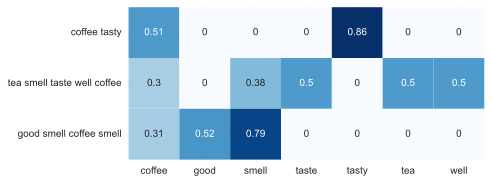

In [ ]:
sns.heatmap(df, square=True, cmap='Blues', annot=True, cbar=False);

## Topic Modeling

### Matrix Decomposition

The document term matrix $X$ is a matrix just like any other in Linear Algebra. Just so, it defines a row space (the documents represented as linear combinations of terms), and column space (terms represented as a linear combination of documents). With this, there are a few matrix decomposition methods we can use to extract further information about these documents and terms.

In [ ]:
from sklearn.decomposition import TruncatedSVD, NMF, PCA

### Singular Value Decomposition

Singular Value Decomposition is a guaranteed decomposition for any rectangular matrix. It creates the following equality:

$$
X = U\Sigma V^\top
$$

**Breifly**:
- Each row of $U$ represents the corresponding document in terms of "topics directions" along the columns.
- The rows of $V$ (columns of $V^\top$) represent similarly represented version of the terms.
- The $\Sigma$ matrix contains the "variance explained" by each of these topics, sorted in descending order.

As far as naming goes:

- The analysis of these resulting matrices is called **Principal Components Analysis (PCA)**.
- When used with text data, this analysis is called **Latent Semantic Analysis (LSA)**.

In [ ]:
corpus = tokenizer(df_coffee['spacy_doc'], join_tokens=True)

In [ ]:
cv = TfidfVectorizer(max_df=0.9,
                     min_df=0.1,
                     max_features=None)

X = cv.fit_transform(corpus)
# df = pd.DataFrame(X, index=corpus, columns=cv.get_feature_names_out())

Note, we use `TruncatedSVD` here because it's a more efficient implementation of SVD. PCA centers the data before running the algorithm, which is more "appropriate" but takes more time. This does cause a few inconsistencies in the "sorted" $\Sigma$.

In [ ]:
lsa = TruncatedSVD(n_components=5)  # results only change for larger (unseen) values

doc_topic = lsa.fit_transform(X)
lsa.explained_variance_ratio_

array([0.00488584, 0.08197821, 0.04773752, 0.04683695, 0.03503009])

In [ ]:
topic_term = pd.DataFrame(lsa.components_.round(3),
                          columns = cv.get_feature_names_out())

topic_term

,acidity,almond,bake,balanced,bright,brisk,butter,cedar,center,chocolate,...,sweet,sweetly,syrup,syrupy,tart,tone,undertone,velvety,vibrant,zest
0,0.192,0.124,0.090,0.103,0.117,0.072,0.068,0.167,0.082,0.256,...,0.280,0.146,0.079,0.144,0.195,0.248,0.077,0.070,0.066,0.148
1,0.072,-0.025,-0.142,0.065,0.120,-0.018,-0.019,-0.109,-0.003,-0.460,...,0.034,0.030,0.041,0.038,0.113,0.032,-0.017,-0.046,0.071,0.040
2,0.042,0.064,0.307,-0.042,-0.124,0.198,0.059,0.140,-0.008,-0.067,...,0.102,-0.060,0.060,-0.147,-0.111,0.107,0.059,0.126,-0.089,0.018
3,-0.120,0.008,-0.109,-0.008,0.008,-0.083,0.034,0.071,-0.013,-0.033,...,-0.171,-0.040,-0.043,-0.042,0.030,0.098,0.008,-0.013,-0.018,0.007
4,-0.084,-0.150,-0.116,0.018,-0.164,-0.027,-0.081,-0.077,-0.061,-0.070,...,0.085,-0.145,-0.063,0.044,-0.376,-0.070,0.033,0.019,-0.049,-0.060


In [ ]:
# the third "topic"
topic = 0
n_terms = 10

topic_term.T[topic].abs().sort_values(ascending=False).iloc[:n_terms]

sweet        0.280
chocolate    0.256
tone         0.248
cocoa        0.219
tart         0.195
structure    0.193
acidity      0.192
note         0.174
cedar        0.167
dark         0.159
Name: 0, dtype: float64

In [ ]:
# the third "topic"
topic = 1
n_terms = 10

topic_term.T[topic].abs().sort_values(ascending=False).iloc[:n_terms]

cocoa        0.476
chocolate    0.460
nib          0.386
dark         0.304
chocolaty    0.245
milk         0.165
espresso     0.164
evaluate     0.161
small        0.160
bake         0.142
Name: 1, dtype: float64

**<span style = "color: darkorange;"> What about negative values? </span>**

### Non-Negative Matrix Factorization

[NMF](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) is very similar to SVD. Here, we have the following decomposition.

$$
X = WH
$$

In this case though, all values in $W$ and $H$ are positive, and we can *approximate* this decomposition because all values in $X$ are positive.

In [ ]:
nmf = NMF(4)  # here, the number will change the results
doc_topic = nmf.fit_transform(X)

In [ ]:
topic_term = pd.DataFrame(nmf.components_.round(3),
                          columns = cv.get_feature_names_out())

topic_term

,acidity,almond,bake,balanced,bright,brisk,butter,cedar,center,chocolate,...,sweet,sweetly,syrup,syrupy,tart,tone,undertone,velvety,vibrant,zest
0,0.935,0.390,0.000,0.612,0.863,0.000,0.084,0.017,0.353,0.822,...,1.423,0.902,0.233,1.220,1.005,0.604,0.089,0.000,0.557,0.651
1,0.000,0.173,0.000,0.046,0.000,0.000,0.132,0.617,0.113,1.568,...,0.029,0.133,0.000,0.176,0.177,0.399,0.185,0.119,0.000,0.136
2,0.546,0.483,0.959,0.103,0.000,0.609,0.300,0.657,0.210,0.710,...,0.896,0.237,0.293,0.031,0.198,0.699,0.274,0.438,0.000,0.352
3,0.492,0.164,0.000,0.364,0.488,0.018,0.112,0.284,0.167,0.000,...,0.504,0.334,0.230,0.309,0.704,0.737,0.193,0.048,0.261,0.378


In [ ]:
# the third "topic"
topic = 0
n_terms = 10

topic_term.T[topic].sort_values(ascending=False).iloc[:n_terms]

savory        2.346
sweet         1.423
long          1.284
flavor        1.231
syrupy        1.220
juicy         1.124
sandalwood    1.122
structure     1.109
resonant      1.048
richly        1.024
Name: 0, dtype: float64

In [ ]:
# the third "topic"
topic = 1
n_terms = 10

topic_term.T[topic].sort_values(ascending=False).iloc[:n_terms]

chocolate    1.568
dark         1.294
milk         1.136
espresso     1.132
evaluate     1.104
small        1.102
chocolaty    1.015
cedar        0.617
fruit        0.524
floral       0.492
Name: 1, dtype: float64

As you can tell, this often produces more agreeable results than LSA.

### Latent Dirichlet Allocation (LDA)

LDA is a "generative" model that builds topics with the assumption that documents are generated based on a probability distribution of topics, and that topics are just a probability distribution of terms.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# these parameters require tuning ...
lda = LatentDirichletAllocation(n_components=5,
                                max_iter=50)

X_topics = lda.fit_transform(X)

In [ ]:
df_lda = pd.DataFrame(data = X_topics,
                      index = corpus)

In [ ]:
# the third "topic"
topic = 0
n_docs = 3

for d in df_lda[topic].sort_values(ascending=False).iloc[:n_docs].index:
    print(d, '\n')

rich toned deeply sweetly earthy chocolate fudge white sage blackberry perique pipe tobacco plumeria like flower aroma cup balanced sweet savory structure vibrant juicy acidity delicate satiny mouthfeel resonant flavor saturate finish display note blackberry tobacco short plumeria sage long deep chocolate 

richly sweet spice tone dry cherry lemon zest baker chocolate cashew hint cayenne aroma cup delicate sweetly tart structure bright acidity crisp velvety mouthfeel flavor saturate finish center citrus note chocolate short suggestion cayenne long 

crisply sweet spice tone dry papaya caramel tangerine zest pink peppercorn vanilla aroma cup high tone sweetly tart structure juicy bright acidity lean satiny smooth mouthfeel resonant richly dry finish laden sweet note caramel papaya short turn savory lean long hint pink peppercorn wrap vanilla 



In [ ]:
# the third "topic"
topic = 1
n_docs = 3

for d in df_lda[topic].sort_values(ascending=False).iloc[:n_docs].index:
    print(d, '\n')

crisply sweet fruit tone raspberry fresh cut fir maple syrup cocoa powder freesia like flower aroma cup sweet structure brisk acidity satiny smooth mouthfeel gently dry finish center quiet note raspberry fir 

delicate richly sweet fruit center dry strawberry baker chocolate magnolia fresh cut fir maple syrup aroma cup sweet tone structure brisk acidity smooth satiny mouthfeel finish consolidate note dry strawberry fresh cut fir crisp chocolate undertone 

delicate crisply sweet tart lime zest baker chocolate plum fresh cut fir hint apple brandy aroma cup richly bittersweet structure brisk acidity satiny mouthfeel finish consolidate note lime zest aromatic wood whisper fruit tone sweet ferment 



In [ ]:
df_lda_terms = pd.DataFrame(data = lda.components_,
                            columns = cv.get_feature_names_out())

In [ ]:
# the third "topic"
topic = 0
n_terms = 10

df_lda_terms.T[topic].sort_values(ascending=False).iloc[:n_terms]

chocolate     101.033380
savory         94.750382
dark           86.249478
sweet          80.362850
sandalwood     71.432099
structure      62.792699
tart           61.633377
flavor         56.361521
juicy          56.046942
tone           55.880879
Name: 0, dtype: float64

In [ ]:
# the third "topic"
topic = 1
n_terms = 10

df_lda_terms.T[topic].sort_values(ascending=False).iloc[:n_terms]

fresh      93.371331
cut        74.890213
oak        73.093144
sweet      41.511522
nut        38.027043
brisk      34.048280
tone       30.348093
crisply    27.419471
gently     26.364764
zest       24.825095
Name: 1, dtype: float64

### Anchored Correlation Explanation (CorEx)

[CorEx](https://github.com/gregversteeg/corex_topic) is a discriminative model, which starts from $X$ (documents/words) to determine $Y$ (topics). CorEx looks for groups of words that are in the same topic, a.k.a. have high Total Correlation (TC), or convey the same information.

- If words are **tightly related** (always appear together in the same topic/document), TC will be high. This is a good topic.
- If the words are all **independent** (never appear together in the same document or topic), TC = 0. This is a bad topic.
- CorEx creates a partition across terms. I.e., **terms can only occur in a single topic**.

CorEx roughly follows this algorithm:
1. Look for a group of words that are both as broad (in many documents) and overlapping as possible (both together will lead to high TC), and call this a topic.
2. Repeat the process for another set of words (not overlapping with your previous group) with as high a TC as possible, and call this the next topic.

As we create more topics, each subsequent topic will have lower TC.

In [ ]:
from corextopic import corextopic as ct

In [ ]:
topic_model = ct.Corex(n_hidden=5,                        # number of topics
                       words=cv.get_feature_names_out(),  # list of terms in corpus
                       seed=1)

topic_model.fit(X, words=cv.get_feature_names_out(), docs=corpus)

In [ ]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: espresso,evaluate,small,milk,chocolaty,nib,chocolate,cocoa,dark,juicy
1: almond,brisk,crisp,cut,like
2: deeply,fruit,richly,round,satiny,undertone
3: fresh,hint,sandalwood,zest
4: crisply,flower,gently,note,oak,rich,tone


Take a look at how you can use [anchor words](https://github.com/gregversteeg/corex_topic/tree/master#using-anchor-words) to guide the topic creation.

## ScatterText

Scattertext is great for
- Visually inspecting text
- Comparing/Contrasting corpora
- And more...

Check out Jason Kessler's GitHub project for more information: [here](https://github.com/JasonKessler/scattertext).

In [ ]:
import scattertext as st

In [ ]:
convention_df = st.SampleCorpora.ConventionData2012.get_data()

In [ ]:
convention_df.head()

,party,text,speaker
0,democrat,Thank you. Thank you. Thank you. Thank you so ...,BARACK OBAMA
1,democrat,"Thank you so much. Tonight, I am so thrilled a...",MICHELLE OBAMA
2,democrat,Thank you. It is a singular honor to be here t...,RICHARD DURBIN
3,democrat,"Hey, Delaware. \nAnd my favorite Democrat, Jil...",JOSEPH BIDEN
4,democrat,"Hello. \nThank you, Angie. I'm so proud of how...",JILL BIDEN


In [ ]:
corpus = st.CorpusFromPandas(convention_df,
                             category_col='party',
                             text_col='text',
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()

In [ ]:
html = st.produce_scattertext_explorer(
        corpus,
        category='democrat',
        category_name='Democratic',
        not_category_name='Republican',
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        metadata=convention_df['speaker'],
        )

In [ ]:
with open('demo.html', 'wb') as f:
    f.write(html.encode('utf-8'))

## Sentiment Analysis with VADER

According to the documentation:

    VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. [...]
    
    Sentiment ratings from 10 independent human raters (all pre-screened, trained, and quality checked for optimal inter-rater reliability). Over 9,000 token features were rated on a scale from "[–4] Extremely Negative" to "[4] Extremely Positive", with allowance for "[0] Neutral (or Neither, N/A)".

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

ModuleNotFoundError: No module named 'vaderSentiment'

In [ ]:
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             # "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled, ignored for seaborn plot below
             "Not bad at all"  # Capitalized negation
             ]

In [ ]:
df_sentiment = []

analyzer = SentimentIntensityAnalyzer()

for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    df_sentiment.append(vs)

In [ ]:
df_sentiment = pd.DataFrame(df_sentiment,
                            index = sentences)

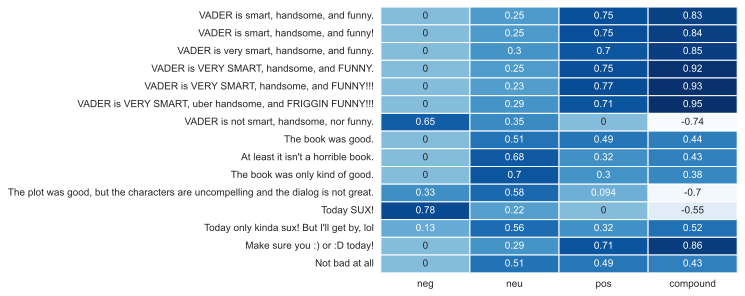

In [ ]:
sns.heatmap(df_sentiment, cmap='Blues', annot=True, cbar=False, linewidths=1);

# EXERCISES

## Exercise 1

Using a book from [Project Gutenberg](https://www.gutenberg.org/), get the text data directly from its URL using the `requests` package. Break the book into about 50 sensible "chunks" like chapters or paragraphs, organizing them into a list.

Load this data into a spaCy pipeline and analyze either Named Entities or Parts of Speech in each chunk.

Provide your analysis: What types of entities or parts of speech are common, and what are uncommon? What insights can you draw from these patterns?

*Note*: Do not download any file, make use of URL in your code.

In [ ]:
import requests
import spacy


url = "https://www.gutenberg.org/cache/epub/73102/pg73102.txt"
response = requests.get(url)
text = response.text

chunk_size = len(text) // 50
chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]


nlp = spacy.load("en_core_web_sm")

for i, chunk in enumerate(chunks):
    doc = nlp(chunk)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    
    print(f"Analysis for Chunk {i + 1}:")
    print("Named Entities:")
    for entity, label in entities:
        print(f"{entity} - {label}")
    print("\n")



Analysis for Chunk 1:
Named Entities:
Project Gutenberg eBook - PERSON
the United States - GPE
the United States - GPE
eBook - PRODUCT
Franklin W. Dixon - PERSON
Walter S. Rogers

 - PERSON
March 4, 2024 - DATE
eBook #73102]

Language - LAW
English - LANGUAGE
Bedford - GPE
MA - PERSON
Applewood Books - PERSON
1928 - DATE
Greg Weeks - PERSON
Mary Meehan - PERSON
FRANKLIN W. DIXON - PERSON
HOUSE - ORG
ILLUSTRATED - PERSON
WALTER S. ROGERS

                                - PERSON
NEW YORK - GPE
GROSSET & DUNLAP - ORG
the United States of America

                          Copyright - GPE
1928 - DATE
GROSSET & DUNLAP - ORG
INC - ORG
All Rights Reserved - WORK_OF_ART
Frank
Hardy - PERSON
Joe - PERSON
Two - CARDINAL
last week - DATE
two the week before - DATE
the week - DATE
Martin - PERSON
Chet Morton - PERSON
Frank - PERSON
the day - DATE
three - CARDINAL
Barmet Bay - LOC
Bayport - PERSON
Saturday - DATE
Chet - PERSON
five - CARDINAL
Frank - PERSON
Bayport - PERSON
the Shore
Road - ORG
Ch

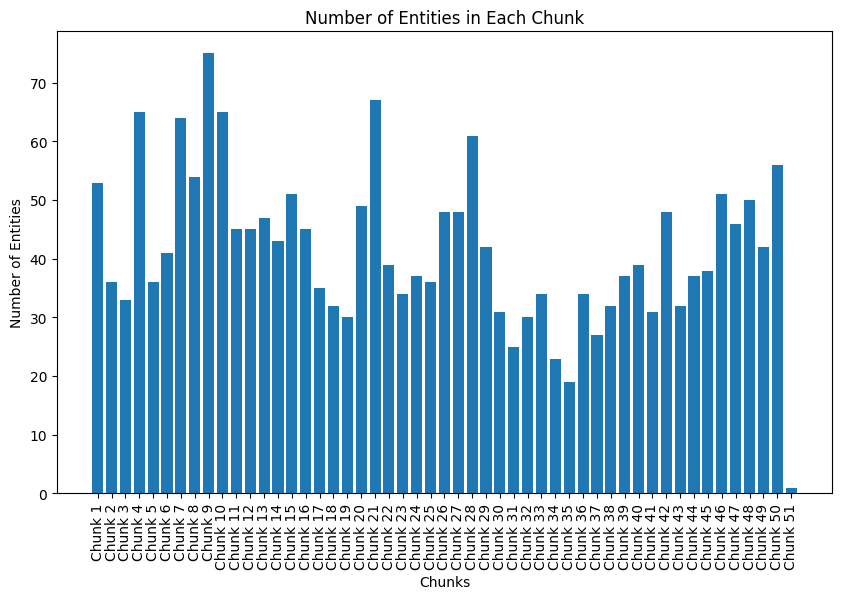

In [13]:
import requests
import spacy
import matplotlib.pyplot as plt

response = requests.get('https://www.gutenberg.org/cache/epub/73102/pg73102.txt')
book_text = response.text


chunks = [book_text[i:i + len(book_text) // 50] for i in range(0, len(book_text), len(book_text) // 50)]

nlp = spacy.load('en_core_web_sm')
entity_analysis_results = []

for i, chunk in enumerate(chunks, 1):
    doc = nlp(chunk)
    analysis_result = [(ent.text, ent.label_) for ent in doc.ents]
    entity_analysis_results.append((i, len(analysis_result)))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar([f"Chunk {chunk_num}" for chunk_num, _ in entity_analysis_results], [num_entities for _, num_entities in entity_analysis_results])
plt.title('Number of Entities in Each Chunk')
plt.xlabel('Chunks')
plt.ylabel('Number of Entities')
plt.xticks(rotation=90)
plt.show()


From this I can see that chunk 9 has a larger number of entities so I may assume that this is where the story gets tense or has a major event happen that involves a lot of characters. 

## Exercise 2

Apply spaCy to extract the most meaningful content from your documents, considering options like excluding stop words or focusing on nouns (i.e. preprocessing and filtering).

Perform a sentiment analysis on the refined data. Create visualization of your result.

Summarize your results by explaining how sentiment changes across sections.

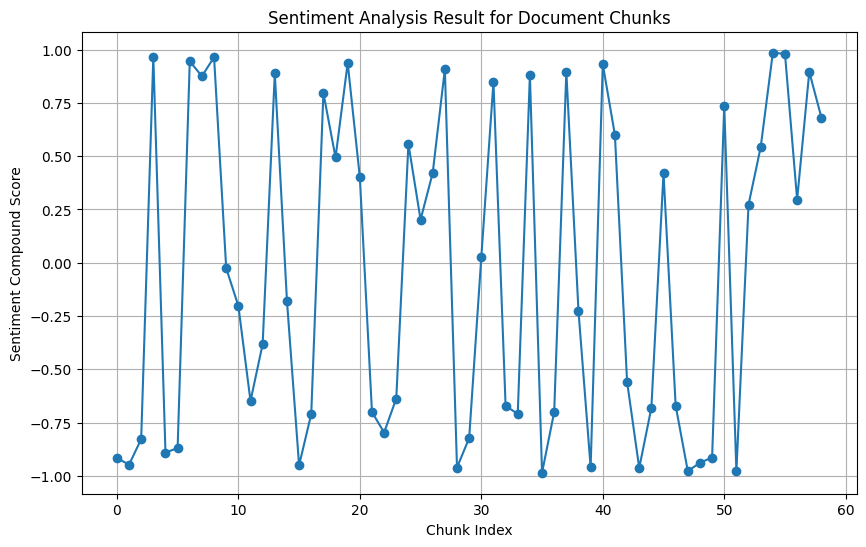

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import requests
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt

# Fetching the text from the URL
response = requests.get('https://www.gutenberg.org/cache/epub/73102/pg73102.txt')
book_text = response.text

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Process the text
doc = nlp(book_text)

# Split the document into chunks (every 1000 words)
chunk_size = 1000
chunks = [doc[i:i+chunk_size] for i in range(0, len(doc), chunk_size)]

# Perform sentiment analysis for each chunk
analyzer = SentimentIntensityAnalyzer()
compound_scores = []

for chunk in chunks:
    filtered_tokens = [token.text.lower() for token in chunk if token.is_alpha and token.text.lower() not in STOP_WORDS and token.pos_ == 'NOUN']
    refined_text = ' '.join(filtered_tokens)
    compound_score = analyzer.polarity_scores(refined_text)['compound']
    compound_scores.append(compound_score)

# Plotting the sentiment analysis result for each chunk
plt.figure(figsize=(10, 6))
plt.plot(range(len(compound_scores)), compound_scores, marker='o', linestyle='-')
plt.title('Sentiment Analysis Result for Document Chunks')
plt.xlabel('Chunk Index')
plt.ylabel('Sentiment Compound Score')
plt.grid(True)
plt.show()


From this I see that the overall sentiment score jumps up and down, but between chunk 30 and 40 theres a lot of positive sentiment compound score meaning there could be something good happening in the plot there. In chunk 40 and 50 there appears to be more negative sentiment points meaning something scary could be happening there. 